# Métricas

En esta Notebook vamos a realizar modelos de aprendizaje automático supervisado de Clasificación para poder observar distintas métricas a utilizar.

Realizaremos el análisis de la Métricas con dos Datasets:

- Predicción de enfermedades de corazón. Se desesa predecir si una persona tendrá un ataque al corazón en base a distintas características.
- Predicción de COVID-19. Se desea predecir si una persona tiene o no Covid en base a una cantidad de variables (entre ellas síntomas).

En ambos casos se utilizaran modelos de KNN para poder repasar lo visto la clase pasada.

[Documentación Scikit Learn](https://scikit-learn.org/stable/modules/model_evaluation.html)

### Predicción Enfermedades cardíacas

##### Problema y Búsqueda de datos

En este caso vamos a realizar un modelo de aprendizaje automático supervisado de clasificación con datos sobre personas que tuvieron un ataque al corazón. En este dataset tenemos distintas características y de acuerdo a ellos se predice si una persona tendrá o no un ataque al corazón para poder observar las distintas métricas con las cuáles se puede evaluar un modelo.

Este dataset fue extraído de [Kaggle](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset)


In [1]:
#importamos las librerías que utilizaremos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("enfermedades_cardiacas.csv")

##### Exploración y limpieza del Dataset

In [3]:
data.head(3)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [4]:
data.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
# Vemos si tiene datos nulos

data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
# Vemos el tipo de datos

data.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [7]:
# Vemos la distribución de la variable target

data["HeartDiseaseorAttack"].value_counts()

#Si bien es un número es una clasificación

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

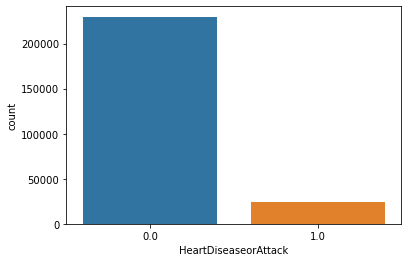

In [8]:
sns.countplot(data["HeartDiseaseorAttack"])

#### Entrenamiento y evaluación del modelo

A partir de la exploración realizada podemos concluir que el Dataset está limpio y podemos pasar al Entrenamiento del modelo.

Realizaremos los siguientes pasos:

- Dividir los datos en **X** (variables predictoras) e **y** (variable a predecir)
- Dividir los datos en entrenamiento y testo con el méodo train_test_split
- Importar e instanciar el modelo que utilizaremos y definir hiperparámetros
- Entrenar el modelo con el método fit
- Testear el modelo con el método predict
- Ver la performance con distintas métricas


In [9]:
# Generamos X e y 
X = data.drop(columns = "HeartDiseaseorAttack")   #variables predictora
y = data["HeartDiseaseorAttack"]   #variable a predecir

In [10]:
# Dividimos datos en train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)  #por default 25% de test


In [11]:
print("El tamaño de X_train es: ", X_train.shape)
print("El tamaño de X_test es: ",X_test.shape)
print("El tamaño de y_train es: ",y_train.shape)
print("El tamaño de y_test es: ",y_test.shape)

El tamaño de X_train es:  (190260, 21)
El tamaño de X_test es:  (63420, 21)
El tamaño de y_train es:  (190260,)
El tamaño de y_test es:  (63420,)


##### Entrenamiento del modelo

Importamos el modelo que utilizaremos: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#Instanciamos el modelo que utilizaremos: KNN. En este caso el hiperparámetro por default es n_neeighbors=5

knn = KNeighborsClassifier()

In [14]:
# Entrenamos el modelo 

knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Probamos y evaluamos nuestro modelo

Utilizamos el metodo predict para probar nuestro modelo con los datos de test. Luego comparamos la predicciones de nuestro modelo con el resultado real a través de una matriz de confusión y utilizando distintas métricas

In [15]:
# Probamos nuestro modelo con los datos de test

y_pred = knn.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

##### Matriz de Confusión

Primero comparamos los resultados en una Matriz de confusión

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [16]:
# Matriz de confusión:comparando resultado original (y_test) con predicción del modelo (y_pred_knn5)
from sklearn.metrics import confusion_matrix


matriz = confusion_matrix(y_test, y_pred)

matriz

array([[56165,  1245],
       [ 5331,   679]], dtype=int64)

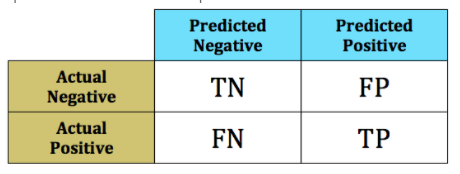

Text(33.0, 0.5, 'Etiquetas reales')

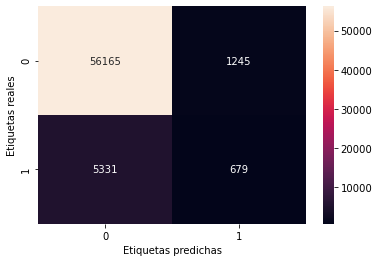

In [17]:
sns.heatmap(matriz, annot=True, fmt="d")
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

##### Métrica Accuracy (exactitud)

[Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): La cantidad bien predicha sobre la cantidad total



In [18]:
# Hacer a mano la cuenta

In [19]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
exactitud

0.896310312204352

##### Métrica Precision

[Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score): La cantidad de positivos predichos sobre la cantidad de valores predichos positivos



In [20]:
# Hacer a mano la cuenta

In [21]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
precision

0.3529106029106029

##### Métrica Recall (exaustividad)

[Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score): La cantidad positivos predichos como positivos sobre la totalidad realmente positivos



In [22]:
# Hacer a mano la cuenta


In [23]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
recall

0.1129783693843594

In [24]:
print("La exactitud del modelo es", round(exactitud,2))
print("La precisión del modelo es", round(precision,2))
print("La exaustividad del modelo es", round(recall,2))

La exactitud del modelo es 0.9
La precisión del modelo es 0.35
La exaustividad del modelo es 0.11


##### Conclusión

Se puede observar que la métrica de *exactitud* es muy buena en este modelo pero dado que las clases están desbalanceadas y que en este caso es importante que toda persona que vaya a tener una enfermedad cardíaca sea identificada, posiblemente no sea la métrica correcta.

En el caso que se identifiquen casos de más, no sería un problema porque solo implica que personas tendran un seguimiento médico innecesario. Por lo cual tal vez la métrica correcta sería *Exaustividad*, asegurarse que todos los positivos sean identificados como positivos. En ese sentido el modelo es bastante malo ya que es 0.11.



### Extra - Predicción COVID-19

En este caso vamos a realizar un modelo de aprendizaje automático supervisado de clasificación con datos sobre COVID-19. 

En este dataset tenemos distintos síntomas y de acuerdo a ellos se predice si una persona tiene o no COVID-19 para poder observar las distintas métricas con las cuáles se puede evaluar un modelo.

Este dataset fue extraído de [Kaggle](https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence)

In [25]:
data= pd.read_csv("Covid Dataset.csv")

##### Exploración y limpieza del Dataset

In [26]:
data.head(3)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes


In [27]:
data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [28]:
# Vemos si tiene datos nulos

data.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [29]:
# Vemos el tipo de datos

data.dtypes

Breathing Problem                          object
Fever                                      object
Dry Cough                                  object
Sore throat                                object
Running Nose                               object
Asthma                                     object
Chronic Lung Disease                       object
Headache                                   object
Heart Disease                              object
Diabetes                                   object
Hyper Tension                              object
Fatigue                                    object
Gastrointestinal                           object
Abroad travel                              object
Contact with COVID Patient                 object
Attended Large Gathering                   object
Visited Public Exposed Places              object
Family working in Public Exposed Places    object
Wearing Masks                              object
Sanitization from Market                   object


In [30]:
data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

##### Variables categóricas

Observamos que las columnas tienen como datos "Yes" y "No", vamos a reemplazarlos por variables dummies.
- Utilizaremos una interación sobre todas las columnas
- Dentro utilizaremos una función apply y lambda que dentro tiene un condicional
- El condicional indica que si el valor en el registro es "Yes" sea reemplazado por "1" y sino por "0"

Si bien estamos modificando la variable COVID-19 sigue siendo una Clasificación ya que sigue siendo una clase, es decir, por más que sea un número sigue siendo una variable categórica ya que indica presencia o ausencia del virus, no indica un valor numérico


In [31]:
for i in data.columns:
    data[i] = data[i].apply(lambda x: 1 if x=="Yes" else 0)

In [32]:
data.dtypes

Breathing Problem                          int64
Fever                                      int64
Dry Cough                                  int64
Sore throat                                int64
Running Nose                               int64
Asthma                                     int64
Chronic Lung Disease                       int64
Headache                                   int64
Heart Disease                              int64
Diabetes                                   int64
Hyper Tension                              int64
Fatigue                                    int64
Gastrointestinal                           int64
Abroad travel                              int64
Contact with COVID Patient                 int64
Attended Large Gathering                   int64
Visited Public Exposed Places              int64
Family working in Public Exposed Places    int64
Wearing Masks                              int64
Sanitization from Market                   int64
COVID-19            

In [33]:
data.head(3)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1


In [34]:
#Distribución de la variable target

data["COVID-19"].value_counts()

#Si bien es un número es una clasificación

1    4383
0    1051
Name: COVID-19, dtype: int64

<AxesSubplot:xlabel='COVID-19', ylabel='count'>

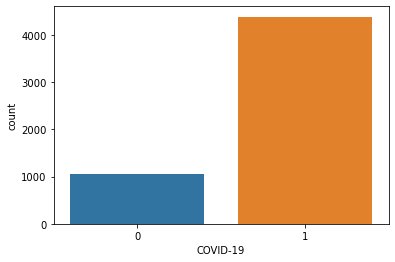

In [35]:
sns.countplot(data["COVID-19"])

#### Entrenamiento y evaluación del modelo

A partir de la exploración realizada podemos concluir que el Dataset está limpio y podemos pasar al Entrenamiento del modelo.

Realizaremos los siguientes pasos:

- Dividir los datos en **X** (variables predictoras) e **y** (variable a predecir)
- Dividir los datos en entrenamiento y testo con el méodo train_test_split
- Importar e instanciar el modelo que utilizaremos y definir hiperparámetros
- Entrenar el modelo con el método fit
- Testear el modelo con el método predict
- Ver la performance con distintas métricas


In [36]:
# Generamos X e y 
X = data.drop(columns = "COVID-19")   #variables predictora
y = data["COVID-19"]   #variable a predecir

In [37]:
# Dividimos datos en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)  #por default 25% de test

In [38]:
print("El tamaño de X_train es: ", X_train.shape)
print("El tamaño de X_test es: ",X_test.shape)
print("El tamaño de y_train es: ",y_train.shape)
print("El tamaño de y_test es: ",y_test.shape)

El tamaño de X_train es:  (4075, 20)
El tamaño de X_test es:  (1359, 20)
El tamaño de y_train es:  (4075,)
El tamaño de y_test es:  (1359,)


##### Entrenamiento del modelo

Importamos el modelo que utilizaremos: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [39]:
# Instanciamos el modelo que utilizaremos: KNN, el hiperparámetro n_neighbors=5

knn = KNeighborsClassifier()

In [40]:
#Entrenamos el modelo 

knn.fit(X_train, y_train)

KNeighborsClassifier()

##### Probamos y evaluamos nuestro modelo

Utilizamos el metodo predict para probar nuestro modelo con los datos de test. Luego comparamos la predicciones de nuestro modelo con el resultado real a través de una matriz de confusión y utilizando distintas métricas

In [41]:
# Probamos nuestro modelo con los datos de test

y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

##### Matriz de Confusión

Primero comparamos los resultados en una Matriz de confusión

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [42]:
# Matriz de confusión:comparando resultado original (y_test) con predicción del modelo (y_pred_knn5)
matriz = confusion_matrix(y_test, y_pred)
matriz

array([[ 248,   16],
       [  21, 1074]], dtype=int64)

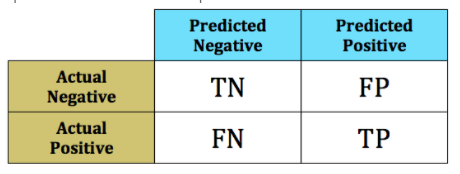

Text(33.0, 0.5, 'Etiquetas reales')

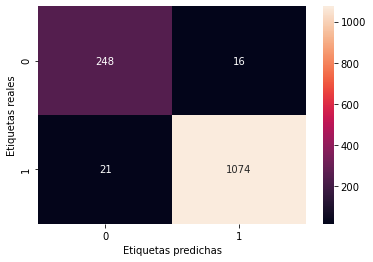

In [43]:
sns.heatmap(matriz, annot=True, fmt="d")
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

##### Métrica Accuracy (exactitud)

[Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): La cantidad bien predicha sobre la cantidad total



In [44]:
# Hacer a mano la cuenta

In [45]:
exactitud = accuracy_score(y_test, y_pred)
exactitud

0.9727740986019132

##### Métrica Precision

[Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score): La cantidad de positivos predichos sobre la cantidad de valores predichos positivos



In [46]:
# Hacer a mano la cuenta
y_test

3164    1
2812    1
939     1
956     1
4039    1
       ..
3016    1
1502    1
2282    1
1705    1
3651    1
Name: COVID-19, Length: 1359, dtype: int64

In [47]:
precision = precision_score(y_test, y_pred)
precision

0.9853211009174312

##### Métrica Recall (exaustividad)

[Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score): La cantidad positivos predichos como positivos sobre la totalidad realmente positivos



In [48]:
# Hacer a mano la cuenta

In [49]:
recall = recall_score(y_test, y_pred)
recall

0.9808219178082191

In [50]:
print("La exactitud del modelo es", round(exactitud,2))
print("La precisión del modelo es", round(precision,2))
print("La exaustividad del modelo es", round(recall,2))

La exactitud del modelo es 0.97
La precisión del modelo es 0.99
La exaustividad del modelo es 0.98


##### Conclusión

Se puede observar que en este caso las 3 métricas muestran resultados similares y muy buenos en todos los casos.

En este problema lo más importante es que todos los casos positivos sean identificados como tales, aunque haya casos que se identifiquen como positivo y no lo eran. 
